<a href="https://colab.research.google.com/github/balzer313/machine-learning-detect-voices/blob/main/%D7%9C%D7%9E%D7%99%D7%93%D7%AA_%D7%9E%D7%9B%D7%95%D7%A0%D7%94_%D7%96%D7%99%D7%94%D7%95%D7%99_%D7%A7%D7%95%D7%9C%D7%95%D7%AA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# למידת  מכונה- זיהוי קולות

## imports



In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import random
import sklearn.neural_network
import pickle
import glob
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## טעינת הנתונים

In [ ]:
df = pd.read_table('/content/drive/My Drive/mechine_learning_voices/speakers.txt', delimiter = ' ')
name_list = df['NAME'].values#יעזור להמשך כשנהפוך מספר לשם- רשימה של השמות
df

,ID,SEX,MINUTES,NAME
0,1,F,25.19,Kara_Shallenberg
1,2,M,25.08,Denny_Sayers
2,3,M,20.14,Sean_McKinley
3,4,F,24.01,Betsie_Bush
4,5,F,25.05,Sherry_Crowther
5,6,F,25.04,Vicki_Barbour
6,7,M,20.18,CBW_Simon
7,8,M,25.05,Hugh_McGuire
8,9,F,25.04,Catharine_Eastman
9,10,F,25.10,Rosalind_Wills


## פונקצית עזר

In [ ]:
def get_data(file):#מטרת הפונקציה היא לקבל קובץ אודיו ולהמיר אותו לנתונים ברי שימוש ללמידת מכונה
  audio, sr = librosa.load(file, res_type= 'kaiser_fast')#get the data and the sample rate of the function file
  mfccs_features = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)#doing the mfccs prograss on the file
  mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
  return mfccs_scaled_features

## הכנת הנתונים למודלים

In [ ]:
x = []
y = []
x_train = []#נתוני קובץ האודיו לאימון
x_test = []#נתוני קובץ האודיו לבדיקה
y_train = []#נתוני האנשים לאימון
y_test = []#נתוני האנשים לבדיקה
path = "/content/drive/My Drive/mechine_learning_voices"
audio_names = os.listdir(path)[1:-1]#the names of the files(1-10)(from 1 to -1 because the first and last files are the table and the voice test for the end)
audio_names.sort()#sort
for i in audio_names:#עובר על הקבצים(בעצם מ1 עד 10)
  audio_files = os.listdir(path + "/" + i)#the file himself
  audio_files_train = audio_files[:int(len(audio_files)*0.8)]#לוקחים 80 אחוז מקבצי הקול בשביל האימון
  audio_files_test = audio_files[int(len(audio_files)*0.8):]#לוקחים את 20 האחוזים הנותרים לבדיקה
  for audio_file in audio_files:#בשביל הבנת הנתונים, נרצה להוסיף את שמות קבצי האודיו ואת המספר המייצג איזה איש הם בטבלה
    x.append(audio_file)#נוסיף את קובץ האודיו
    y.append(int(i))#נוסיף את המספר המייצג את האיש
  for j in audio_files_train:#קבצי האודיו של האימון
    x_train.append(get_data(path+'/'+i+'/'+j))#מוסיף לנתוני האימון את קבצי הדטה של האודיו
    y_train.append(int(i))#מוסיף את הקלאס(המספר שמייצג את האנשים) לנתוני האימון
  for h in audio_files_test:#קבצי האודיו של הבדיקה
    x_test.append(get_data(path+'/'+i+'/'+h))#מוסיף לנתוני הבדיקה את קבצי הדטה של האודיו
    y_test.append(int(i))#מוסיף את הקלאס(המספר שמייצג את האנשים) לנתוני הבדיקה
print(x_train)
print(y_train)

[array([-3.45966003e+02,  1.23087456e+02, -4.18454247e+01,  4.38892822e+01,
       -1.63459473e+01,  9.32766974e-01, -1.87926540e+01, -8.11587143e+00,
       -4.13274670e+00, -6.89913273e+00,  8.80042362e+00, -5.07920802e-01,
        7.37805605e+00, -4.23582506e+00,  4.30196905e+00,  1.06186438e+00,
       -4.47574377e+00, -2.93098330e+00,  3.88135880e-01,  4.88986778e+00,
       -2.57125497e-01,  7.38229465e+00, -1.12893987e+00,  5.24469566e+00,
        4.49721241e+00,  1.45576203e+00,  1.31575594e+01,  9.07191634e-02,
       -8.84154916e-01,  4.77308369e+00, -2.58723617e-01,  7.90583417e-02,
        3.54371524e+00,  2.69437742e+00,  2.80518174e+00,  6.84049964e-01,
       -1.72253096e+00,  4.05869627e+00,  3.31820273e+00, -1.23982978e+00],
      dtype=float32), array([-3.2742838e+02,  1.2193011e+02, -3.0652977e+01,  4.4442062e+01,
       -1.9142778e+01, -2.3822036e+00, -2.0496807e+01, -1.8801935e+01,
       -1.0877099e+01, -8.0656443e+00,  9.7609987e+00,  1.6301122e+00,
        6.025

## הבנת הנתונים

In [ ]:
netunim_df = pd.DataFrame({'file_name': x, 'person':y})
print(len(x))
netunim_df.head(10)

1166


,file_name,person
0,19-198-0000.flac,1
1,19-198-0001.flac,1
2,19-198-0017.flac,1
3,19-227-0036.flac,1
4,19-227-0004.flac,1
5,19-227-0069.flac,1
6,19-227-0019.flac,1
7,19-198-0003.flac,1
8,19-227-0018.flac,1
9,19-227-0064.flac,1


בעצם הנתונים בנויים מקבצים המכילים מספר מ1 עד 10, שמייצגים את שם הבן אדם(ניתן לראות איזה מספר הוא איזה בן אדם בטבלה בהתחלה).
בתוך כל אחד מקבצי האנשים, יש המון קבצי אודיו של אותו בן אדם שביחד מגיעים ל1166 קבצי אודיו. נרצה ללמד את המכונה להבדיל בין הקולות, ולומר לנו איזה קול נכנס למערכת

## עבודה נסיונית עם אודיו ראנדומלי

לפני למידת המכונה רציתי לנסות לשחק עם קובץ אודיו ולראות כיצד הם פועלים ומה אפשר לעשות איתם

path: /content/drive/My Drive/mechine_learning_voices/10/87-121553-0020.flac
sample rate = 22050
data: [-3.0546365e+02  8.6308960e+01 -5.8064938e+01  3.6689297e+01
 -1.7993610e+01 -2.8433917e+00 -2.2562790e+01 -9.8309259e+00
 -1.0938243e+01 -1.8556543e+01 -6.6478524e+00 -7.8802857e+00
 -4.0655680e+00 -7.6267314e+00  3.6018991e+00 -1.2248248e+01
 -3.3282754e+00 -4.1560774e+00 -1.4119462e+01 -6.1630096e+00
 -9.1231489e+00 -4.4831524e+00 -5.6635704e+00 -4.1588894e-01
 -3.6595101e+00 -7.5061268e-01  5.2559471e+00  3.6849656e+00
  6.4673104e+00  2.6217451e+00  8.6479926e-01  9.3451726e-01
  1.0325474e+00 -1.5794568e-01  3.0687542e+00  3.4281726e+00
  1.0023062e+00  1.3652648e+00  2.7701461e+00  1.6512774e+00]
name: Rosalind_Wills


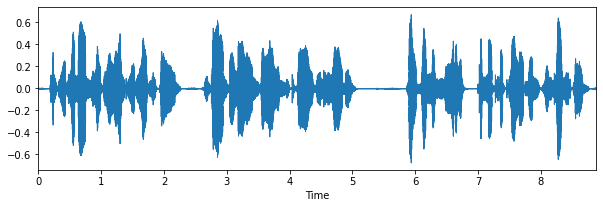

In [ ]:
randomnumber = random.randrange(1, 11)#בוחר מספר ראנדומלי מ1 עד 10 שישמש לבחירת קובץ אודיו ראנדומלי
path = '/content/drive/My Drive/mechine_learning_voices/'
randomaudio = str(path) + str(randomnumber) + '/' +str(os.listdir(str(path)+str(randomnumber))[random.randrange(len(os.listdir(str(path)+str(randomnumber))))])#מגדיר אודיו ראנדומלי
data, sr = librosa.load(randomaudio)#מקבל את הדטה וההרץ של האודיו הראנדומלי
labels = randomnumber#מגדיר את הלייבלס
print("path: "+str(randomaudio))
print("sample rate = " + str(sr))
print("data: " +str(get_data(randomaudio)))
print("name: " +str(name_list[int(labels)-1]))
plt.figure(figsize=(10,3))
librosa.display.waveplot(data, sr = sr)
ipd.Audio(randomaudio)

## mlp

הכנת המודל

In [ ]:
mlp1 = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), max_iter=40, solver='sgd', verbose=True, learning_rate_init=0.05)
mlp2 = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(500,), max_iter=40, solver='sgd', verbose=True, learning_rate_init=0.05)
mlp3 = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), max_iter=40, solver='lbfgs', verbose=True, learning_rate_init=0.05)
mlp4 = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(100,), max_iter=40, solver='lbfgs', verbose=True, learning_rate_init=0.05)
mlp5 = sklearn.neural_network.MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), max_iter=40, solver='adam', verbose=True, learning_rate_init=0.05)
for i in range(1,6):
    filename = f'mlp{i}.sav'
    exec(f"mlp = mlp{i}");
    if not os.path.isfile(filename):
        mlp.fit(x_train, y_train)
        print("Training set score: %f" % mlp.score(x_train, y_train))
        print("Test set score: %f" % mlp.score(x_train, y_train))
        fn = open(filename,'wb')
        pickle.dump(mlp, fn)
        fn.close()

Iteration 1, loss = 22.05651200
Iteration 2, loss = 5.07819276
Iteration 3, loss = 8.05273105
Iteration 4, loss = 10.34792359
Iteration 5, loss = 11.89006958
Iteration 6, loss = 12.86505737
Iteration 7, loss = 13.46311637
Iteration 8, loss = 13.82347823
Iteration 9, loss = 14.03887035
Iteration 10, loss = 14.16717109
Iteration 11, loss = 14.24321096
Iteration 12, loss = 14.28807085
Iteration 13, loss = 14.31476167
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.118534
Test set score: 0.118534
Iteration 1, loss = 28.23883563
Iteration 2, loss = 8.49633795
Iteration 3, loss = 14.21513045
Iteration 4, loss = 19.01466139
Iteration 5, loss = 22.24404813
Iteration 6, loss = 24.28738590
Iteration 7, loss = 25.54157246
Iteration 8, loss = 26.29772210
Iteration 9, loss = 26.75081570
Iteration 10, loss = 27.01990087
Iteration 11, loss = 27.17960751
Iteration 12, loss = 27.27444098
Iteration 13, loss = 27.33030294
Training loss did n

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training set score: 0.886853
Test set score: 0.886853


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training set score: 0.574353
Test set score: 0.574353
Iteration 1, loss = 4.54120603
Iteration 2, loss = 4.02488435
Iteration 3, loss = 2.58752002
Iteration 4, loss = 2.24412694
Iteration 5, loss = 2.05613004
Iteration 6, loss = 1.88757677
Iteration 7, loss = 1.71747059
Iteration 8, loss = 1.57256475
Iteration 9, loss = 1.45543896
Iteration 10, loss = 1.31772124
Iteration 11, loss = 1.23732326
Iteration 12, loss = 1.15791678
Iteration 13, loss = 1.09079548
Iteration 14, loss = 1.07884433
Iteration 15, loss = 1.04216420
Iteration 16, loss = 1.01406352
Iteration 17, loss = 1.02678460
Iteration 18, loss = 0.98698363
Iteration 19, loss = 1.03464698
Iteration 20, loss = 0.98777277
Iteration 21, loss = 0.97283372
Iteration 22, loss = 1.01864454
Iteration 23, loss = 1.01018871
Iteration 24, loss = 0.98643731
Iteration 25, loss = 0.96694966
Iteration 26, loss = 0.93520342
Iteration 27, loss = 0.92532242
Iteration 28, loss = 0.88168333
Iteration 29, loss = 0.91146974
Iteration 30, loss = 0.9432

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


בדיקת ההצלחה

In [ ]:
sav_files = glob.glob("/**/*.sav")
for f in sav_files:
    name = f[-8:-4:]
    infile = open(f, 'rb')
    mlp8 = pickle.load(infile)
    lbl_predict = globals()[name].predict(x_test)
    print(name)
    print("Test set score: %f" % globals()[name].score(x_test, y_test))
    print(confusion_matrix(y_test, lbl_predict))
    print()

mlp4
Test set score: 0.596639
[[23  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  1  0  0  4  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  2  1 20  0]
 [ 0 23  0  2  0  0  0  0  0  0]
 [ 2  0  0  0  0 20  0  1  0  0]
 [ 0  0  0  1  1  0 12  2  4  0]
 [ 0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  2  0  2 21  0]
 [ 0  0  0  0  0  0  0  0  0 22]]

mlp1
Test set score: 0.117647
[[ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0]]

mlp2
Test set score: 0.117647
[[ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0 24  0  

ניתן לראות שההצלחה הגבוהה ביותר הינה רק 85.714%, ננסה עוד מודל שיצליח אולי יותר:

## SVC

הכנת המודל והכנסת נתוני האימון והבדיקה

נבדוק מה הכי טוב ונשתמש בו

In [ ]:
for kernel in ["linear", "poly", 'rbf']:
  for c in range(1,4):
    for gamma in ['scale', 'auto']:
      clf = SVC(kernel = kernel, gamma=gamma, C=c)
      clf.fit(x_train, y_train)
      print(f'for kernel {kernel}, gamma {gamma}, C {c}:')
      print(f'accuracy is {clf.score(x_test, y_test)}')

for kernel linear, gamma scale, C 1:
accuracy is 0.9957983193277311
for kernel linear, gamma auto, C 1:
accuracy is 0.9957983193277311
for kernel linear, gamma scale, C 2:
accuracy is 0.9957983193277311
for kernel linear, gamma auto, C 2:
accuracy is 0.9957983193277311
for kernel linear, gamma scale, C 3:
accuracy is 0.9957983193277311
for kernel linear, gamma auto, C 3:
accuracy is 0.9957983193277311
for kernel poly, gamma scale, C 1:
accuracy is 0.9705882352941176
for kernel poly, gamma auto, C 1:
accuracy is 0.9957983193277311
for kernel poly, gamma scale, C 2:
accuracy is 0.9831932773109243
for kernel poly, gamma auto, C 2:
accuracy is 0.9957983193277311
for kernel poly, gamma scale, C 3:
accuracy is 0.9831932773109243
for kernel poly, gamma auto, C 3:
accuracy is 0.9957983193277311
for kernel rbf, gamma scale, C 1:
accuracy is 0.8991596638655462
for kernel rbf, gamma auto, C 1:
accuracy is 0.31512605042016806
for kernel rbf, gamma scale, C 2:
accuracy is 0.9789915966386554
for ker

המון מהאפשרויות הן אותו דבר, לכן ניקח אחד מהטובים ונשתמש בו

In [ ]:
clf = SVC(kernel = 'linear', C=1)
clf.fit(x_train, y_train)
print(f"the accuracy of the model is {clf.score(x_test,y_test)}")

the accuracy of the model is 0.9957983193277311


ניתן לראות כי המודל עבד 99.579%

## התוכנה עצמה(חיזוי של קול)

In [ ]:
def voice_predict(file_path):
  print(name_list[(clf.predict([get_data(file_path)])[0])-1])#print the name predict of the data file, with help of the name_list(שיצרנו בהתחלה)
  signal, sample_rate = librosa.load(file_path)#get the signal and the sample rate of the file for the graph
  plt.figure(figsize=(10,3))#control the graph size
  librosa.display.waveplot(signal, sr = sample_rate)#display the audio graph
  return ipd.Audio(file_path)#return the audio himself

Hugh_McGuire


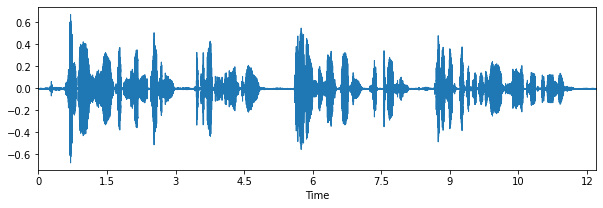

In [ ]:
voice_predict('/content/drive/My Drive/mechine_learning_voices/bdika-8-Hugh_McGuire.flac')